# NBA Data

## 1 - 2017 Players Tattoos

To start in a funny way, we'll work with a dataset about players and if they have tattoos or not. This dataset was made in 2017, so it isn't updated to 2022, but either way, it's nice to have a general idea.

Dataset: https://data.world/fivethirtyeight/nba-tattoos

In [1]:
import pandas as pd

tattoos = pd.read_csv('./dataset/nba-tattoos-data.csv')

# Quick look at the dataset
tattoos.head()

,Player Name,Tattoos yes/no
0,A.J. Price,no
1,Aaron Gray,no
2,Al Horford,no
3,Al Jefferson,no
4,Al Thornton,no


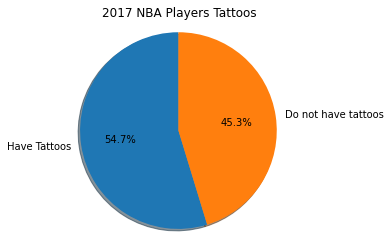

In [2]:
import matplotlib.pyplot as plt

have_tattoos = sum(tattoos["Tattoos yes/no"] == "yes")/len(tattoos["Tattoos yes/no"]) # 54.7%
dont_tattoos = sum(tattoos["Tattoos yes/no"] == "no")/len(tattoos["Tattoos yes/no"])  # 45.3%

labels = 'Have Tattoos', 'Do not have tattoos'
info = [have_tattoos, dont_tattoos]

fig1, ax1 = plt.subplots()
ax1.pie(info, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')

plt.title("2017 NBA Players Tattoos")

plt.show()

From the graphic above, we can check that most of 2017 NBA players (54.7%) had tattoos.<br /><br />
But now, let's check how this percentage works for the 11 best players of the league that year. The list of the best players was made based on the MVP voting.

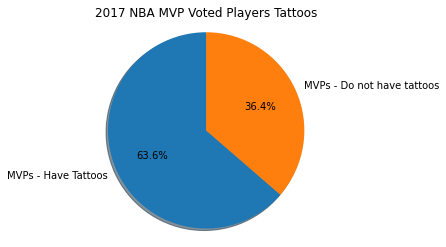

In [3]:
best_players = ["Russell Westbrook", "James Harden", "Kawhi Leonard", "LeBron James", "Isaiah Thomas", "Stephen Curry", "Giannis Antetokounmpo", "John Wall", "Anthony Davis", "Kevin Durant", "DeMar DeRozan"]

tattoos_mvps = tattoos[tattoos["Player Name"].isin(best_players)]

have_tattoos_mvp = sum(tattoos_mvps["Tattoos yes/no"] == "yes")/len(tattoos_mvps["Tattoos yes/no"]) # 63.6%
dont_tattoos_mvp = sum(tattoos_mvps["Tattoos yes/no"] == "no")/len(tattoos_mvps["Tattoos yes/no"])  # 36.4%

labels = 'MVPs - Have Tattoos', 'MVPs - Do not have tattoos'
info = [have_tattoos_mvp, dont_tattoos_mvp]

fig1, ax1 = plt.subplots()
ax1.pie(info, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')

plt.title("2017 NBA MVP Voted Players Tattoos")

plt.show()

There it is! 63.6% of the 11 best NBA players from 2017 had tattoos. So, can we say that if you're a good basketball player, you have more chances to have a tattoo? I personally don't see any correlation in that, especially because the 2017 MVP (Russell Westbrook) was one of the players who doesn't have a tattoo.<br /><br />
But, feel free to think that way if you want to.<br /><br />
Now, if you want to search for a player from the 2017 NBA Season in order to know if he had tattoos, just type the First + Last of the player down below and the program will search for you that information.

In [4]:
player_name = input("Enter the player name (First Name + Last Name): ")

Enter the player name (First Name + Last Name): Stephen Curry


In [5]:
if tattoos["Player Name"].str.contains(player_name).any():
    player_index = tattoos[tattoos["Player Name"]==player_name].index.values
    
    if tattoos["Tattoos yes/no"][player_index[0]]=="yes":
        print(("The Player " + tattoos["Player Name"][player_index] + " have tattoos!").to_string())
    else:
        print((tattoos["Player Name"][player_index] + " does not have tattoos!").to_string())
else:
    print("Player not found in the Dataset!\nHint: Make sure you wrote the First and Last Name correctly (eg.: 'Stephen Curry', not just 'Curry' or 'Steph Curry').\nAlso, make sure the player was already in the league in the 2017 season!")

548    The Player Stephen Curry have tattoos!


## 2 - 2022 Players Stats

After a light (but fun) start, let's go through a dataset that include data of basically every stat a basketball player can have in a season (from minutes per game to personal fouls). Although the dataset contain data from players of the 1997-1998 season until the current season (2021-2022), we'll just work with the 2021-2022 season, so we can extract and analyze some information of this season in specifically.

Dataset: https://data.world/etocco/nba-player-stats

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt

# This dataset is already preprocessed, so there aren't NA values.
# Another important thing to know is that this dataset have separated and total information about players that were traded,
# so some players can have 2 or more rows associated to them.

season_2022_raw = pd.read_csv('./dataset/nba_player_stats.csv')

# Filter to the 2021-2022 season and change some column names
season_2022 = season_2022_raw[season_2022_raw["Year"]=="2021-2022"]

season_2022 = season_2022.rename(columns={'Tm': 'Team', 'Pos': 'Position'})

# Quick look at the dataset
season_2022.head()

,Rk,Player,Position,Age,Team,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
13770,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,2021-2022
13771,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,2021-2022
13772,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,2021-2022
13773,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,2021-2022
13774,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,2021-2022


Let's start with some basic (and interesting) information about the players and the league in the 2021-2022 season

Age related facts:
1. The oldest player in the league is Udonis Haslem (MIA) and he is 41 years old.
2. The youngest players are 19 years and there are 13 of them.
3. The league's average age is 26 years old.
4. Graphic of the age distribution: 


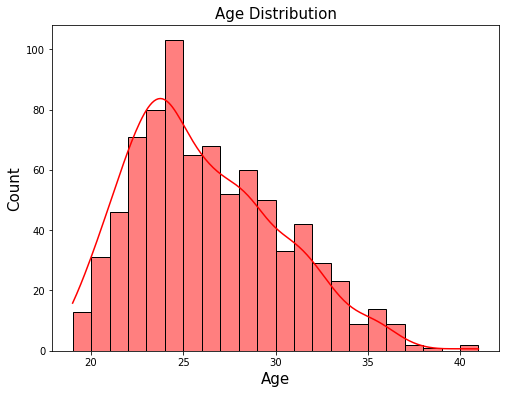

In [7]:
# Age related
oldest_player = season_2022["Age"].idxmax()
youngest_player = season_2022["Age"].min()
average_age = season_2022["Age"].mean()

print("Age related facts:")
# There is only one player with 41 years old (if you want to check, just print: sum(season_2022["Age"]==oldest_player)
print("1. The oldest player in the league is " + season_2022["Player"][oldest_player] + " (" + season_2022["Team"][oldest_player]  + ") and he is " + str(season_2022["Age"][oldest_player]) + " years old.")
print("2. The youngest players are " + str(youngest_player) + " years and there are " + str(sum(season_2022["Age"]==youngest_player)) + " of them.")
print("3. The league's average age is " + str(int(average_age)) + " years old.")
print("4. Graphic of the age distribution: ")

fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(season_2022["Age"], color="red", kde=True, ax=ax, binwidth=1)
ax.set_title('Age Distribution', fontsize= 15)
plt.ylabel("Count", fontsize= 15)
plt.xlabel("Age", fontsize= 15)
plt.show()

In [8]:
# Player related
player_count = len(season_2022["Player"].unique())
players_all_games = season_2022[season_2022["G"] == 82]

print("Players general information facts:")

print("1. There are " + str(player_count) + " players in the 2021-2022 NBA Season.")
print("2. There were only " + str(len(players_all_games["Player"])) + " players that played all the 82 season games. Here are they:\n\tSaddiq Bey*\n\tMikal Bridges*\n\tKevon Looney\n\tDwight Powell\n* These players started all the 82 games!")

Players general information facts:
1. There are 599 players in the 2021-2022 NBA Season.
2. There were only 4 players that played all the 82 season games. Here are they:
	Saddiq Bey*
	Mikal Bridges*
	Kevon Looney
	Dwight Powell
* These players started all the 82 games!


Position related facts:
1. Graphic of Position Distribution:


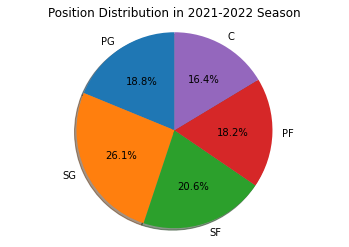

In [9]:
# Position related

print("Position related facts:")

season_2022_drop = season_2022.drop_duplicates(subset=['Player'])

print("1. Graphic of Position Distribution:")

# Some players have more than one position
PG = season_2022_drop["Position"].str.count(r'PG').sum()/len(season_2022_drop["Player"])
SG = season_2022_drop["Position"].str.count(r'SG').sum()/len(season_2022_drop["Player"])
SF = season_2022_drop["Position"].str.count(r'SF').sum()/len(season_2022_drop["Player"])
PF = season_2022_drop["Position"].str.count(r'PF').sum()/len(season_2022_drop["Player"])
C = season_2022_drop["Position"].str.count(r'C').sum()/len(season_2022_drop["Player"])

labels = 'PG', 'SG', 'SF', 'PF', 'C'
info = [PG, SG, SF, PF, C]

fig1, ax1 = plt.subplots()
ax1.pie(info, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')

plt.title("Position Distribution in 2021-2022 Season")

plt.show()

Game stats related facts:
1. Top 10 PPG (Points Per Game) in 2021-2022 season: 


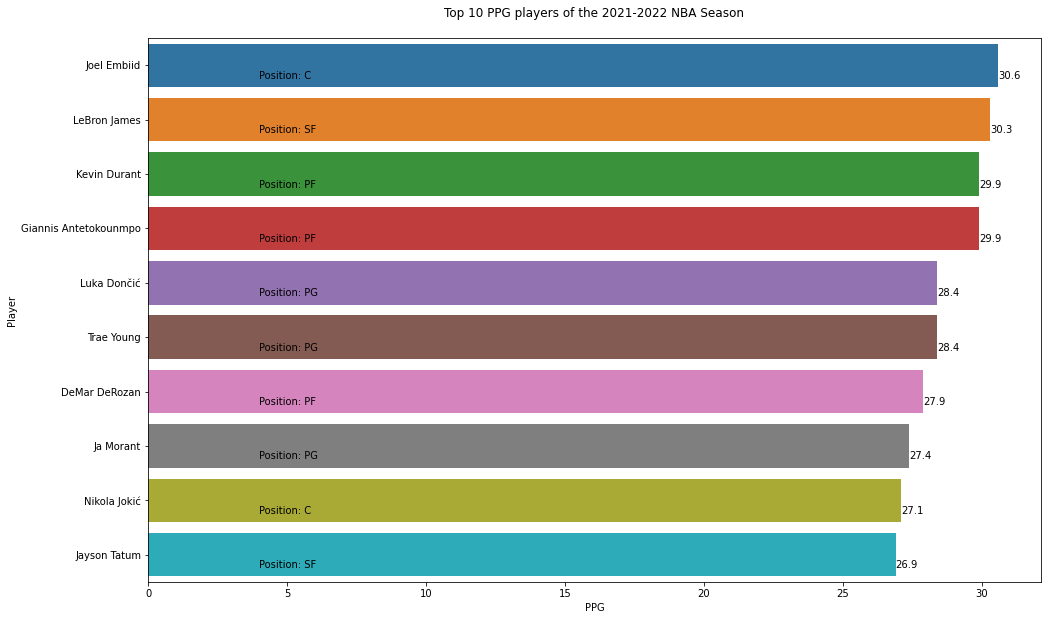

In [10]:
# Game stats related

print("Game stats related facts:")

# Minimum of 41 games played
season_2022_drop = season_2022_drop[season_2022_drop['G']>40]

#############################################################

print("1. Top 10 PPG (Points Per Game) in 2021-2022 season: ")
season_2022_PTS = season_2022_drop.sort_values(by='PTS', ascending=False)

plt.figure(figsize = (16,10))

sns.barplot(y = season_2022_PTS["Player"][0:10], x = season_2022_PTS.PTS[0:10], orient = "h")

for i in range(10):
    
    plt.text(4.0, 
             i + 0.25, 
             str("Position: " + season_2022_PTS['Position'][season_2022_PTS.index[i]]))
    
    plt.text(season_2022_PTS.PTS[season_2022_PTS.index[i]],
             i + 0.25,
             round(season_2022_PTS["PTS"][season_2022_PTS.index[i]],2))

plt.ylabel('Player')
plt.xlabel('PPG')
plt.title('Top 10 PPG players of the 2021-2022 NBA Season\n')
plt.show()

2. Top 10 APG (Assists Per Game) in 2021-2022 season: 


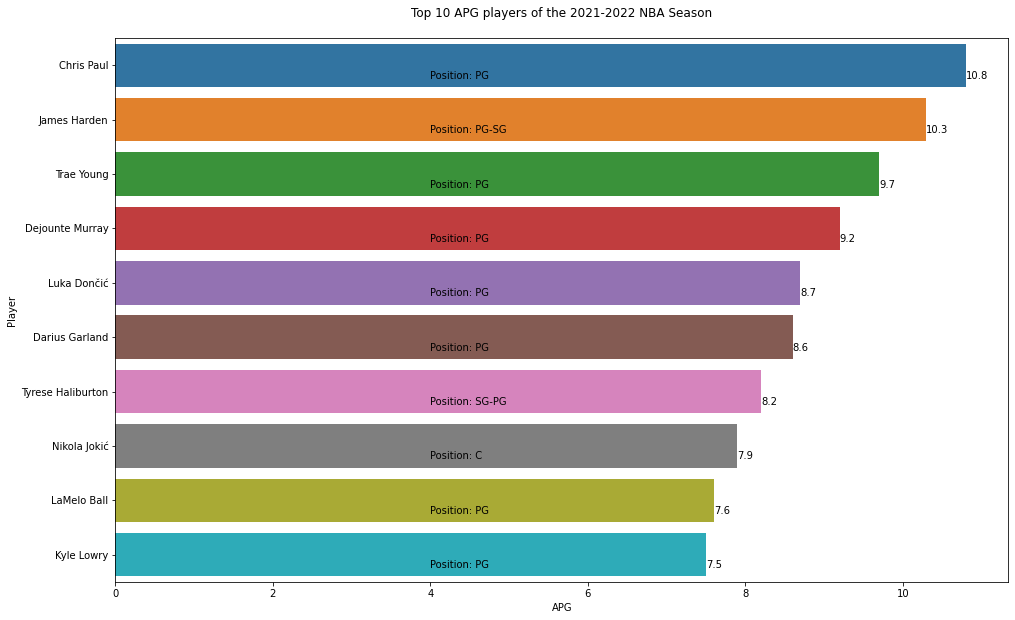

In [11]:
print("2. Top 10 APG (Assists Per Game) in 2021-2022 season: ")
season_2022_AST = season_2022_drop.sort_values(by='AST', ascending=False)

plt.figure(figsize = (16,10))

sns.barplot(y = season_2022_AST["Player"][0:10], x = season_2022_AST.AST[0:10], orient = "h")

for i in range(10):
    
    plt.text(4.0, 
             i + 0.25, 
             str("Position: " + season_2022_AST['Position'][season_2022_AST.index[i]]))
    
    plt.text(season_2022_AST.AST[season_2022_AST.index[i]],
             i + 0.25,
             round(season_2022_AST["AST"][season_2022_AST.index[i]],2))

plt.ylabel('Player')
plt.xlabel('APG')
plt.title('Top 10 APG players of the 2021-2022 NBA Season\n')
plt.show()

3. Top 10 RPG (Rebound Per Game) in 2021-2022 season: 


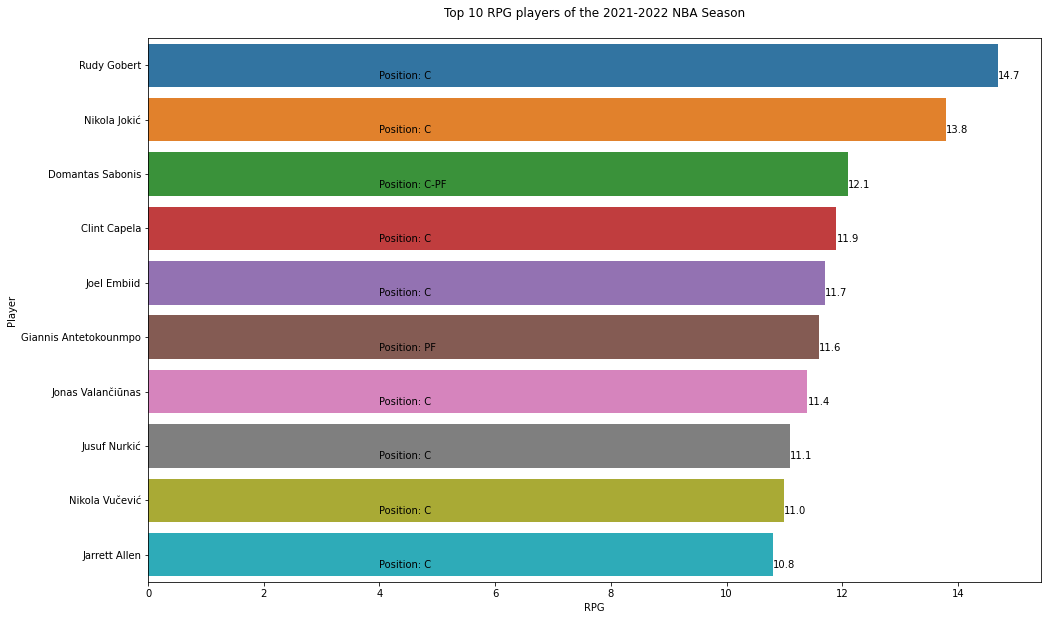

In [12]:
print("3. Top 10 RPG (Rebound Per Game) in 2021-2022 season: ")
season_2022_TRB = season_2022_drop.sort_values(by='TRB', ascending=False)

plt.figure(figsize = (16,10))

sns.barplot(y = season_2022_TRB["Player"][0:10], x = season_2022_TRB.TRB[0:10], orient = "h")

for i in range(10):
    
    plt.text(4.0, 
             i + 0.25, 
             str("Position: " + season_2022_TRB['Position'][season_2022_TRB.index[i]]))
    
    plt.text(season_2022_TRB.TRB[season_2022_TRB.index[i]],
             i + 0.25,
             round(season_2022_TRB["TRB"][season_2022_TRB.index[i]],2))

plt.ylabel('Player')
plt.xlabel('RPG')
plt.title('Top 10 RPG players of the 2021-2022 NBA Season\n')
plt.show()

In [13]:
present_all_stats = [player for player in season_2022_PTS["Player"][0:10].tolist() if player in season_2022_AST["Player"][0:10].tolist() and player in season_2022_TRB["Player"][0:10].tolist()]
print("Interesting fact is only one player is present in all 3 Top 10 Lists: " + present_all_stats[0] + "\nNo wonders he's this season KIA MVP (Most Valuable Player)!")

Interesting fact is only one player is present in all 3 Top 10 Lists: Nikola Jokić
No wonders he's this season KIA MVP (Most Valuable Player)!
